In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
trial_data = pd.read_csv(clinical_trial_data_to_load)
mouse_data = pd.read_csv(mouse_drug_data_to_load)
# mouse_data

# Combine the data into a single dataset
merged_data = trial_data.merge(mouse_data, on = 'Mouse ID')
# merged_data.head()



## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_vol = pd.DataFrame(merged_data.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"])
# Convert to DataFrame
# avgvol_df = pd.DataFrame(mean_vol)
# avgvol_df

# Preview DataFrame
# mean_vol.head()

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# stderror_vol = pd.DataFrame(stats.sem(mean_vol))
# stderror_vol
sem_vol = pd.DataFrame(merged_data.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"])
# Convert to DataFrame
sem_vol = sem_vol.rename(columns = {"Tumor Volume (mm3)": "Standard Error"})
# Preview DataFrame
# sem_vol.head()



In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_vol_pivot = pd.pivot_table(mean_vol, index=["Timepoint"], values="Tumor Volume (mm3)", columns=["Drug"])
mean_vol_pivot = mean_vol_pivot.drop(columns =['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'])
# Preview that Reformatting worked
# mean_vol_pivot

In [5]:
# Minor Data Munging to Re-Format the Data Frames
sem_vol_pivot = pd.pivot_table(sem_vol, index=["Timepoint"], values="Standard Error", columns=["Drug"])
sem_vol_pivot = sem_vol_pivot.drop(columns =['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'])
# sem_vol_pivot = ["Capomulin", "Infubinol", "Ketapril","Placebo"]

# Preview that Reformatting worked
# sem_vol_pivot

NameError: name 'x' is not defined

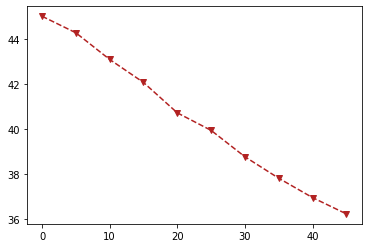

In [29]:
# Generate the Plot (with Error Bars)
drugs=["Capomulin", "Infubinol", "Ketapril","Placebo"]
colors=["firebrick","steelblue","olivedrab","purple"]
markers=["v","o","^","d"]

fig, ax = plt.subplots()
# x_axis
# print(fig, ax)
count = 0 

for drug in drugs:
    x_axis =mean_vol_pivot.index
    plt.plot(x_axis, mean_vol_pivot[drug], linestyle='--', marker=markers[count], color=colors[count], label=drug, markeredgecolor = colors[count], markerfacecolor=colors[count])
    plt.errorbar(x, y, yerr=sem_vol_pivot[drug])
    count +=1  

    
# The rest of the plot formatting
plt.title("Tumor Response to Treatment", fontsize=16)
plt.legend(loc="best", fontsize = "small", fancybox = True)
ax.set_xlim(0,45)
ax.set_xlabel("Treatment Duration(Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.grid(linestyle='dotted')


# plt.errorbar(mean_vol_pivot, count, sem_vol_pivot, linestyle = "--")
# plt.legend(drugs, markers)
# plt.errorbar(mean_vol_pivot, yeer=sem_vol_pivot)
plt.show()
# Save the Figure
fig.savefig("Tumor Response to Treatment.png", dpi=300, bbox_inches='tight')
# Show the PNG



![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [338]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint # Convert to DataFrame
mean_sites = pd.DataFrame(merged_data.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"])

# Preview DataFrame
# mean_sites.head()

In [339]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint # Convert to DataFrame
sem_sites = pd.DataFrame(merged_data.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"])
sem_sites = sem_sites.rename(columns = {"Metastatic Sites": "Standard Error"})

# Preview DataFrame
# sem_sites.head()

In [340]:
# Minor Data Munging to Re-Format the Data Frames
mean_sites_pivot = pd.pivot_table(mean_sites, index=["Timepoint"], values="Metastatic Sites", columns=["Drug"])
mean_sites_pivot = mean_sites_pivot.drop(columns =['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'])
# Preview that Reformatting worked
# mean_sites_pivot

In [341]:
# Minor Data Munging to Re-Format the Data Frames
sem_sites_pivot = pd.pivot_table(sem_sites, index=["Timepoint"], values="Standard Error", columns=["Drug"])
sem_sites_pivot = sem_sites_pivot.drop(columns =['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'])
# sem_vol_pivot = ["Capomulin", "Infubinol", "Ketapril","Placebo"]

# Preview that Reformatting worked
# sem_vol_pivot

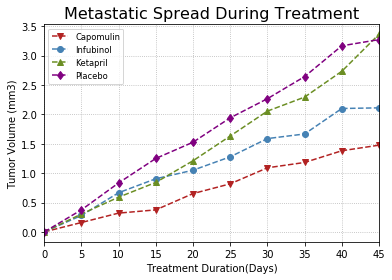

In [342]:
fig, ax = plt.subplots()
# x_axis
# print(fig, ax)
count = 0 

for drug in drugs:
    x_axis =mean_sites_pivot.index
    plt.plot(x_axis, mean_sites_pivot[drug], linestyle='--', marker=markers[count], color=colors[count], label=drug, markeredgecolor = colors[count], markerfacecolor=colors[count])
#     plt.errorbar(x_axis, mean_vol_pivot[drug], sem_vol_pivot[drug])
    count +=1  
    
# The rest of the plot formatting
plt.title("Metastatic Spread During Treatment", fontsize=16)
plt.legend(loc="best", fontsize = "small", fancybox = True)
ax.set_xlim(0,45)
ax.set_xlabel("Treatment Duration(Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.grid(linestyle='dotted')


fig.savefig("Metastatic Spread During Treatment", dpi=300, bbox_inches='tight')

# plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [345]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric) & Convert to DataFrame
mouse_count = pd.DataFrame(merged_data.groupby(["Drug","Timepoint"]).count()["Mouse ID"])
mouse_count = mouse_count.rename(columns = {"Mouse ID": "Survivals"})
# ["Mouse Count"])

# Preview DataFrame
# mouse_count.head()

In [346]:
# Minor Data Munging to Re-Format the Data Frames & Preview the Data Frame
mouse_count_pivot = pd.pivot_table(mouse_count, index=["Timepoint"], values="Survivals", columns=["Drug"])
mouse_count_pivot = mouse_count_pivot.drop(columns =['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'])
# mouse_count_pivot

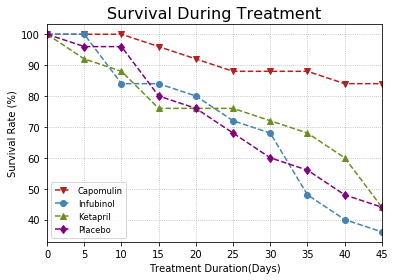

In [347]:
fig, ax = plt.subplots()
# x_axis
# print(fig, ax)
count = 0 

for drug in drugs:
    x_axis =mouse_count_pivot.index
    y_data=(mouse_count_pivot[drug] * 100) / mouse_count_pivot[drug][0]

    plt.plot(x_axis, y_data, linestyle='--', marker=markers[count], color=colors[count], label=drug, markeredgecolor = colors[count], markerfacecolor=colors[count])
#     plt.errorbar(x_axis, mean_vol_pivot[drug], sem_vol_pivot[drug])
    count +=1  
    
# The rest of the plot formatting
plt.title("Survival During Treatment", fontsize=16)
plt.legend(loc="best", fontsize = "small", fancybox = True)
ax.set_xlim(0,45)
ax.set_xlabel("Treatment Duration(Days)")
ax.set_ylabel("Survival Rate (%)")
plt.grid(linestyle='dotted')

fig.savefig("Survival During Treatment", dpi=300, bbox_inches='tight')


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [359]:
# Summary of the analysis based on % Tumor Change over 45 days

''' make the first the last row a variable of length'''
summary=round(((mean_vol_pivot.iloc[9,:]-mean_vol_pivot.iloc[0,:])*100/mean_vol_pivot.iloc[0,:]),2).to_frame()
# Renaming the column
summary=summary.rename(columns={0:"% Tumor Change"})

# Display the data to confirm
# summary

In [360]:
# Store all Relevant Percent Changes into a Tuple
# summary_t = tuple(summary)
# summary_t

# Splice the data between passing and failing drugs
passing = summary["% Tumor Change"] < 0 
# passing




[0.49, 1.49, 2.49, 3.49]


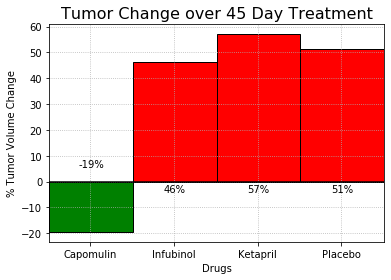

In [364]:
# Intializing the plots
fig,ax=plt.subplots()
# Setting the x_axis and y-axis value
x_axis=summary.index.values
y_axis=summary["% Tumor Change"]
#Setting the plot and assigning the color based on the Positive or not value
bars=ax.bar(x_axis,y_axis,align="edge",width=1,linewidth=1,
            edgecolor=passing.map({True: 'black', False: 'black'}),
            color=passing.map({True: 'green', False: 'red'}))
# Setting the ticks for the bar graph
tick_locations = [value+0.49 for value in range(len(x_axis))]
print(tick_locations)
ax.set_xticks(tick_locations)

# Setting the text label in the bar graph
# Assign the height based on the positive calue
height = passing.map({True: 5, False: -5})
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2., height[bars.index(bar)],
            str(int(summary["% Tumor Change"][bars.index(bar)]))+"%",
                ha='center', va='bottom')
    
# Setting the x_axis limits
ax.set_xlim(0, len(x_axis))
# Setting a horizontal line at y=0
plt.hlines(0,0,len(x_axis))
# Setting the title of the graph
ax.set_title("Tumor Change over 45 Day Treatment", fontsize=16)
# Setting the y_axis label
ax.set_ylabel("% Tumor Volume Change")
ax.set_xlabel("Drugs")

# Setting the grid line
plt.grid(linestyle='dotted')

# Display the graph
# plt.show()
fig.savefig("Tumor Change over 45 Day Treatment.png", dpi=300, bbox_inches='tight')

![Metastatic Spread During Treatment](../Images/change.png)